<a href="https://colab.research.google.com/github/Jose-Bruno/ProcessamentoDigitalDeImagens/blob/main/Jos%C3%A9_Bruno_da_Silva_Santos_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

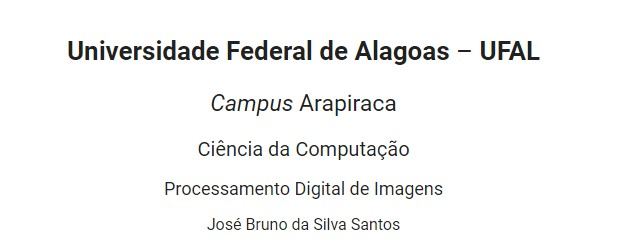

# Implementação - Transformada de Fourier





## Bibliotecas e configurações

In [28]:
from google.colab.patches import cv2_imshow
from skimage import io
from matplotlib import pyplot as plt
import cv2 as cv 
import numpy as np

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imagem Utilizada

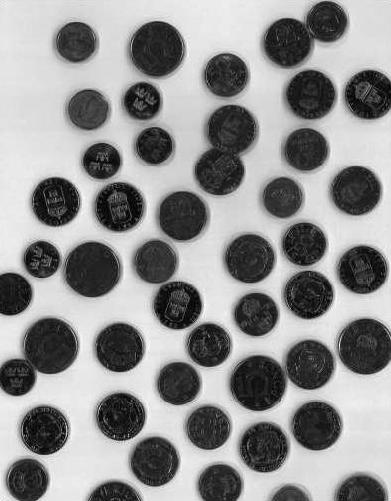

**Carregando Imagem para Utilização**

In [30]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Imagens/coins.jpg"
img = cv.cvtColor(io.imread(image_path), cv.COLOR_RGBA2GRAY)

## Domínio de Frequência



1.   A filtragem no domínio de frequência realiza operações com a Transformada de Fourier de uma imagem e não diretamente na própria imagem.
2.   Geralmente são executados os seguintes passos:
    *   Primeiro é aplicada a transformada de fourier que traz a representação da imagem no espaço para o domínio de frequência;

  *   Então, como os valores no domínio de frequência geralmente são altos, é utilizada uma função logarítmica para baixar os valores e assim melhorar a visualização;
  *   Em seguida é aplicada a operação shift, que leva as baixas frequências para o centro e as altas frequências para as bordas;
  *   Esse é o momento da aplicação de algum filtro na imagem (ainda no domínio de frequência);
  *   Após a aplicação do filtro, é feito o shift inverso para retornar com as baixas frequências nas bordas e as altas no centro;
  *   Por último, é calculada a transformada inversa de fourier para trazer o resultado da imagem filtrada no domínio de frequência para o domínio espacial.











**Transformação de Fourier**

No código abaixo é aplicada a tranformada de fourier na imagem, como função nativa da biblioteca NumPy.

Como resultado se tem o espectro da transformada de fourier com as baixas frequências nos cantos e as altas frequências no centro.

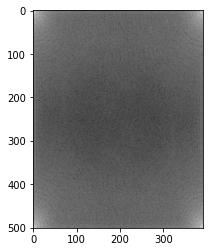

In [31]:
img_fft = np.fft.fft2(img)
plt.imshow(np.log(1 + np.abs(img_fft)), cmap="gray")
plt.show()

**Shift**

No código abaixo é aplicado o shift (também como função nativa do NumPy).

Agora as baixas frequências ficam no centro e as altas ficam nos cantos. Essa composição facilita a utilização dos filtros.

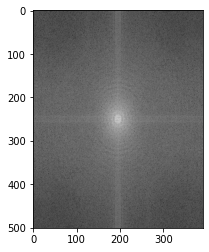

In [32]:
img_fft_shift = np.fft.fftshift(img_fft)
plt.imshow(np.log(1 + np.abs(img_fft_shift)), cmap="gray")
plt.show()

**Shift Inverso**

Após a aplicação de algum filtro, é feito o shift inverso no codigo abaixo.

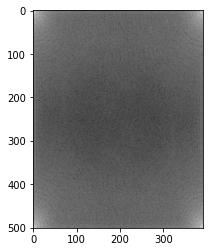

In [33]:
img_fft_shift_inverso = np.fft.ifftshift(img_fft_shift)

plt.imshow(np.log(1 + np.abs(img_fft_shift_inverso)), cmap="gray")
plt.show()

**Transformada Inversa de Fourier.**

Como nenhum filtro foi aplicado a imagem original é restaurada sem perdas de informações

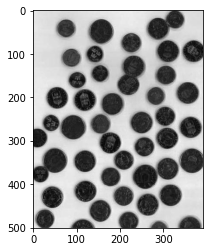

In [34]:
img_fft_inversa = np.fft.ifft2(img_fft_shift_inverso)
plt.imshow(np.abs(img_fft_inversa), cmap="gray")
plt.show()

**Distância Euclidiana**

In [35]:
from math import sqrt

def distancia_euclidiana(point_1,point_2):
    return sqrt((point_1[0]-point_2[0])**2 + (point_1[1]-point_2[1])**2)